## Exponential Smoothing methods

#### Exponential smoothing methods consist of flattening time series data.

#### Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations.

#### Exponential smoothing methods consist of special case exponential moving with notation ETS (Error, Trend, Seasonality) where each can be none(N), additive (A), additive damped (Ad), Multiplicative (M) or multiplicative damped (Md).

#### One or more parameters control how fast the weights decay.

#### These parameters have values between 0 and 1

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('AirPassenger.csv', parse_dates=True, index_col='Year-Month')
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


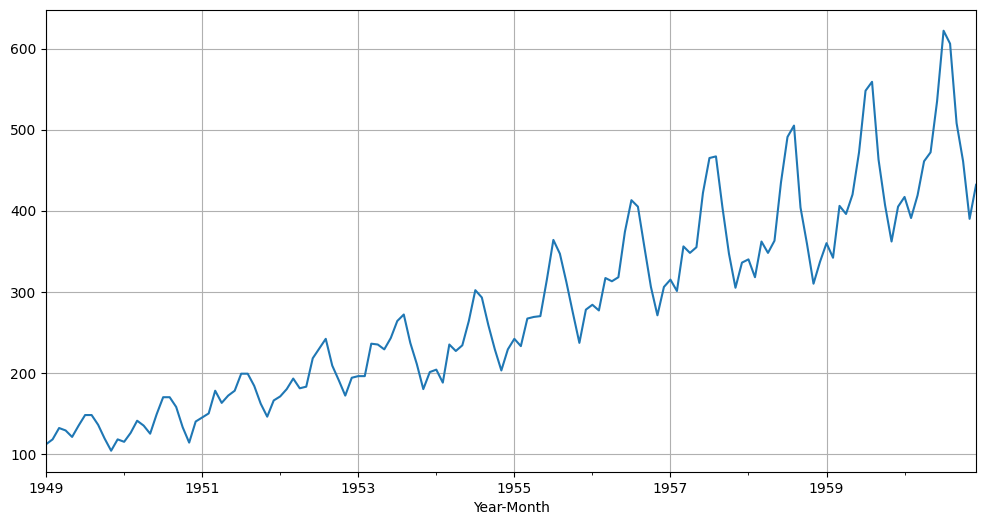

In [34]:
plt.figure(figsize=(12,6))
df['Pax'].plot(grid=True)

plt.show()

In [35]:
train = df[df.index < '1957']
test = df[df.index >= '1957']

In [36]:
train.tail()

,Pax
Year-Month,
1956-08-01,405
1956-09-01,355
1956-10-01,306
1956-11-01,271
1956-12-01,306


## SES - ETS(A,N,N) - Simple Exponential Smoothing/Single Exponential Smoothing - Takes only Level into consideration. No Trend, Seasonality

$F_{t+1} = \alpha\times Y_t+(1−\alpha)F_t$

#### $\alpha$ is smoothing constant

In [37]:
model_SES = SimpleExpSmoothing(train, initialization_method='estimated')

In [38]:
model_SES_autofit = model_SES.fit(optimized=True)

In [39]:
model_SES_autofit.params   # Smoothing parameter is almost 1

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 111.99999978976538,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [40]:
SES_predict = model_SES_autofit.forecast(len(test))
SES_predict                                         # Beacause smoothing constant is almost 1, previous observations have very less contribution.

1957-01-01    305.999999
1957-02-01    305.999999
1957-03-01    305.999999
1957-04-01    305.999999
1957-05-01    305.999999
1957-06-01    305.999999
1957-07-01    305.999999
1957-08-01    305.999999
1957-09-01    305.999999
1957-10-01    305.999999
1957-11-01    305.999999
1957-12-01    305.999999
1958-01-01    305.999999
1958-02-01    305.999999
1958-03-01    305.999999
1958-04-01    305.999999
1958-05-01    305.999999
1958-06-01    305.999999
1958-07-01    305.999999
1958-08-01    305.999999
1958-09-01    305.999999
1958-10-01    305.999999
1958-11-01    305.999999
1958-12-01    305.999999
1959-01-01    305.999999
1959-02-01    305.999999
1959-03-01    305.999999
1959-04-01    305.999999
1959-05-01    305.999999
1959-06-01    305.999999
1959-07-01    305.999999
1959-08-01    305.999999
1959-09-01    305.999999
1959-10-01    305.999999
1959-11-01    305.999999
1959-12-01    305.999999
1960-01-01    305.999999
1960-02-01    305.999999
1960-03-01    305.999999
1960-04-01    305.999999


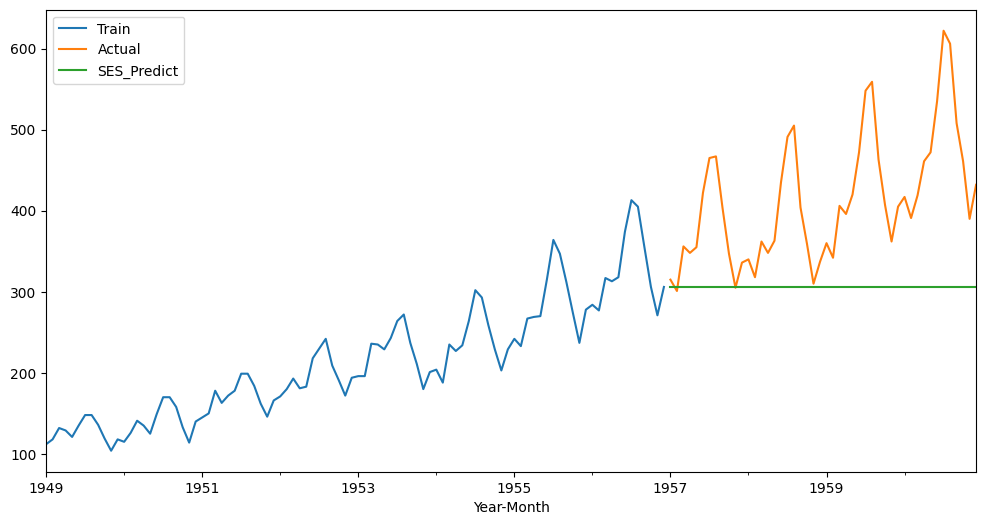

In [41]:
plt.figure(figsize=(12,6))
train['Pax'].plot()
test['Pax'].plot()
SES_predict.plot()
plt.legend(['Train','Actual','SES_Predict'])
plt.show()

#### Model Evaluation

In [42]:
error1 = mean_squared_error(test['Pax'], SES_predict, squared=False)
error1

132.60993908995977

## Holt's Linear Method - ETS(A,A,N) - Double Exponential Smoothing

#### This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.

#### One smoothing parameter α corresponds to the level series
#### A second smoothing parameter $\beta$ corresponds to the trend series.

#### Level equation, $L_t$ is given by: $L_t = \alpha\times Y_t + (1−\alpha)F_t$
#### Trend equation is given by $T_t = \beta(L_t−L_{t−1})+(1−\beta)T_{t−1}$
#### Forecast $F_{t+n} = L_t + nT_t$

In [43]:
model_DES = Holt(train,initialization_method='estimated')

In [44]:
model_DES_autofit = model_DES.fit()

In [45]:
model_DES_autofit.params   # Slight decrease in α and β very small

{'smoothing_level': 0.995,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 118.46666666666661,
 'initial_trend': 2.0606060606060677,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [46]:
DES_predict = model_DES_autofit.forecast(len(test))
DES_predict

1957-01-01    307.895780
1957-02-01    309.955346
1957-03-01    312.014911
1957-04-01    314.074477
1957-05-01    316.134042
1957-06-01    318.193608
1957-07-01    320.253173
1957-08-01    322.312739
1957-09-01    324.372304
1957-10-01    326.431870
1957-11-01    328.491436
1957-12-01    330.551001
1958-01-01    332.610567
1958-02-01    334.670132
1958-03-01    336.729698
1958-04-01    338.789263
1958-05-01    340.848829
1958-06-01    342.908395
1958-07-01    344.967960
1958-08-01    347.027526
1958-09-01    349.087091
1958-10-01    351.146657
1958-11-01    353.206222
1958-12-01    355.265788
1959-01-01    357.325353
1959-02-01    359.384919
1959-03-01    361.444485
1959-04-01    363.504050
1959-05-01    365.563616
1959-06-01    367.623181
1959-07-01    369.682747
1959-08-01    371.742312
1959-09-01    373.801878
1959-10-01    375.861444
1959-11-01    377.921009
1959-12-01    379.980575
1960-01-01    382.040140
1960-02-01    384.099706
1960-03-01    386.159271
1960-04-01    388.218837


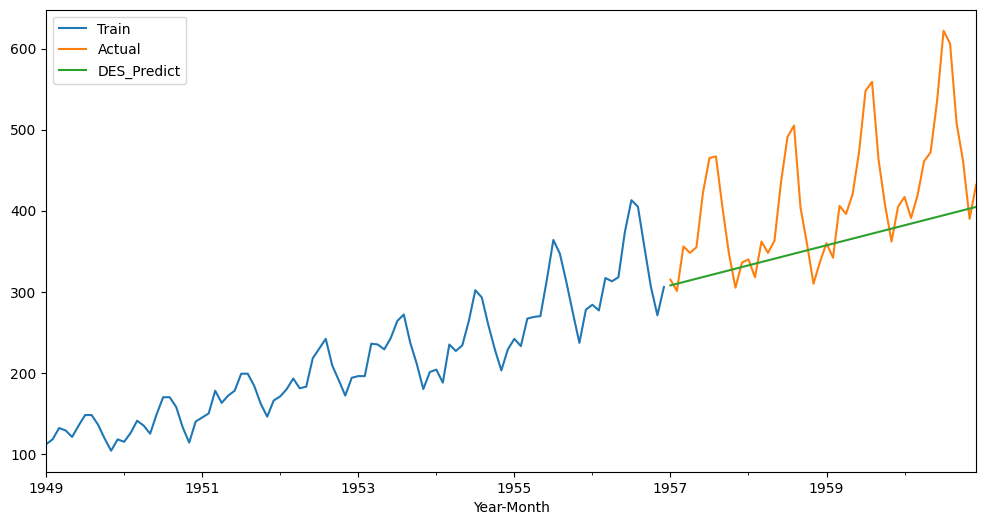

In [47]:
plt.figure(figsize=(12,6))
train['Pax'].plot()
test['Pax'].plot()
DES_predict.plot()
plt.legend(['Train','Actual','DES_Predict'])
plt.show()

#### Model_Evaluation

In [48]:
error2 = mean_squared_error(test['Pax'], DES_predict, squared=False)
error2

87.45546145655501

## Holt's Winter Linear Method. Accounts for Level, Trend and Seasonality

### 1. Additive

In [49]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')

In [50]:
model_TES_autofit = model_TES.fit()

In [51]:
model_TES_autofit.params

{'smoothing_level': 0.2546479853045878,
 'smoothing_trend': 4.481080498835302e-11,
 'smoothing_seasonal': 0.7453520145735568,
 'damping_trend': nan,
 'initial_level': 118.77322461130976,
 'initial_trend': 2.3328374760552713,
 'initial_seasons': array([ -9.10618614,  -3.5081976 ,   8.96481878,   3.69203202,
         -5.0729336 ,   9.02639251,  21.23873975,  18.81342065,
          4.68320282, -14.11913811, -28.55978344, -11.95262674]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
TES_predict = model_TES_autofit.forecast(len(test))
TES_predict

1957-01-01    319.235270
1957-02-01    311.528386
1957-03-01    350.278691
1957-04-01    346.984976
1957-05-01    351.845022
1957-06-01    403.925707
1957-07-01    440.566797
1957-08-01    427.446477
1957-09-01    376.628169
1957-10-01    329.767502
1957-11-01    296.561275
1957-12-01    341.114757
1958-01-01    347.229320
1958-02-01    339.522435
1958-03-01    378.272740
1958-04-01    374.979026
1958-05-01    379.839072
1958-06-01    431.919757
1958-07-01    468.560847
1958-08-01    455.440527
1958-09-01    404.622218
1958-10-01    357.761552
1958-11-01    324.555324
1958-12-01    369.108806
1959-01-01    375.223370
1959-02-01    367.516485
1959-03-01    406.266790
1959-04-01    402.973076
1959-05-01    407.833122
1959-06-01    459.913806
1959-07-01    496.554897
1959-08-01    483.434577
1959-09-01    432.616268
1959-10-01    385.755602
1959-11-01    352.549374
1959-12-01    397.102856
1960-01-01    403.217420
1960-02-01    395.510535
1960-03-01    434.260840
1960-04-01    430.967125


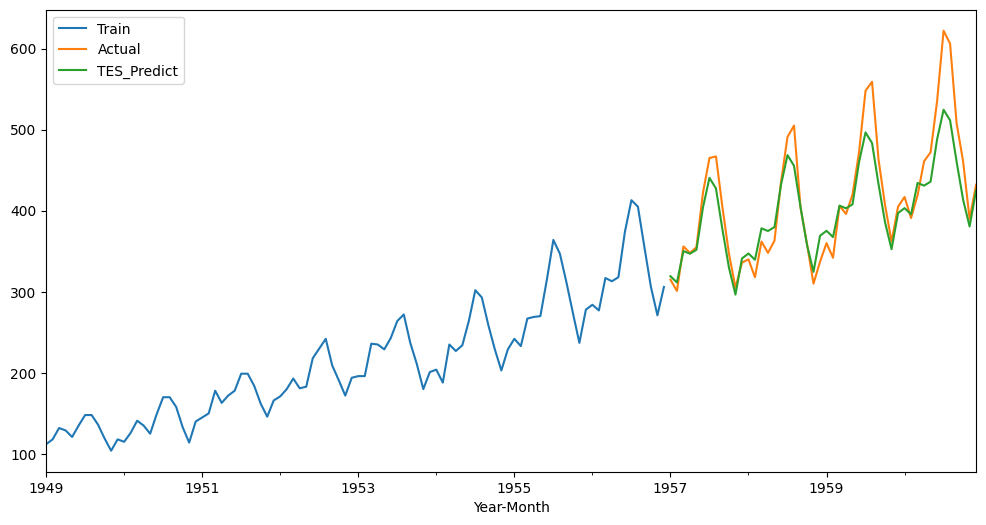

In [53]:
plt.figure(figsize=(12,6))
train['Pax'].plot()
test['Pax'].plot()
TES_predict.plot()
plt.legend(['Train','Actual','TES_Predict'])
plt.show()

### Model Evaluation

In [54]:
error3 = mean_squared_error(test['Pax'], TES_predict, squared=False)
error3

31.900095263095885

### 2. Multiplicative

In [55]:
model_TES_mul = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')

In [56]:
model_TES_mul_autofit = model_TES_mul.fit()

In [57]:
model_TES_mul_autofit.params

{'smoothing_level': 0.6903013894244917,
 'smoothing_trend': 1.8518149880850295e-10,
 'smoothing_seasonal': 5.0983904649056075e-11,
 'damping_trend': nan,
 'initial_level': 100.42257894978115,
 'initial_trend': 1.0105364381945456,
 'initial_seasons': array([1.1198728 , 1.09655052, 1.25754815, 1.21573754, 1.20801944,
        1.36246655, 1.50508372, 1.47208565, 1.29322216, 1.12316135,
        0.97615874, 1.10295888]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [58]:
TES_mul_predict = model_TES_mul_autofit.forecast(len(test))
TES_mul_predict

1957-01-01    315.018040
1957-02-01    311.707572
1957-03-01    361.239563
1957-04-01    352.908804
1957-05-01    354.363161
1957-06-01    403.880112
1957-07-01    450.857455
1957-08-01    445.618955
1957-09-01    395.599462
1957-10-01    347.197575
1957-11-01    304.934778
1957-12-01    348.175180
1958-01-01    357.239243
1958-02-01    353.485081
1958-03-01    409.655740
1958-04-01    400.208427
1958-05-01    401.857708
1958-06-01    458.011313
1958-07-01    511.284930
1958-08-01    505.344324
1958-09-01    448.620824
1958-10-01    393.731735
1958-11-01    345.804543
1958-12-01    394.840366
1959-01-01    405.119266
1959-02-01    400.861941
1959-03-01    464.561036
1959-04-01    453.847519
1959-05-01    455.717850
1959-06-01    519.397604
1959-07-01    579.811371
1959-08-01    573.074559
1959-09-01    508.748528
1959-10-01    446.502769
1959-11-01    392.151998
1959-12-01    447.759988
1960-01-01    459.416548
1960-02-01    454.588622
1960-03-01    526.825172
1960-04-01    514.675745


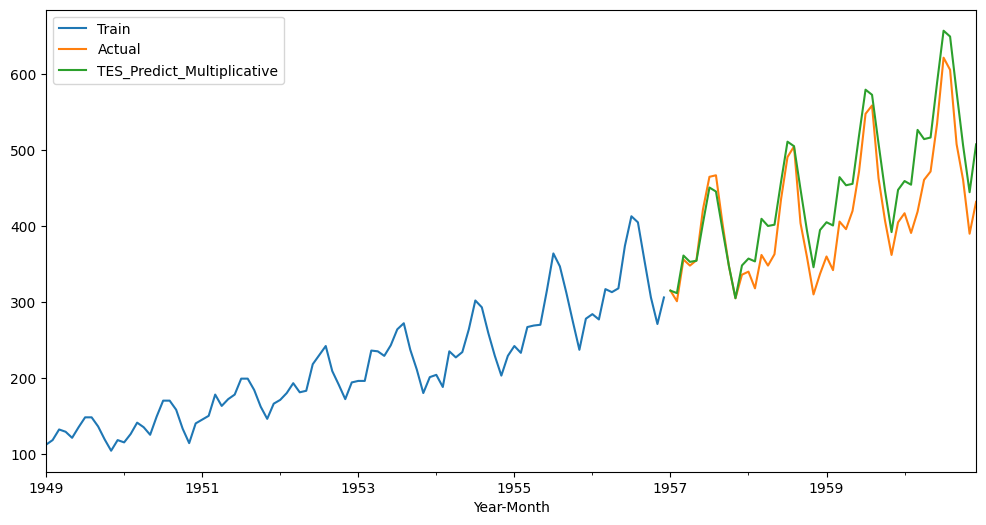

In [59]:
plt.figure(figsize=(12,6))
train['Pax'].plot()
test['Pax'].plot()
TES_mul_predict.plot()
plt.legend(['Train','Actual','TES_Predict_Multiplicative'], loc='best')
plt.show()

### Model Evaluation

In [60]:
error4 = mean_squared_error(test['Pax'], TES_mul_predict, squared=False)
error4

42.23054147553188

### Different Models and their RMSE's

In [61]:
pd.DataFrame({'Models':['SES','DES','TES_Add','TES_Mul'], 'RMSE':[error1,error2,error3,error4]}).set_index('Models')

,RMSE
Models,
SES,132.609939
DES,87.455461
TES_Add,31.900095
TES_Mul,42.230541


### Multiplicative Triple Exp Smoothing didn't work well compared with Additive.

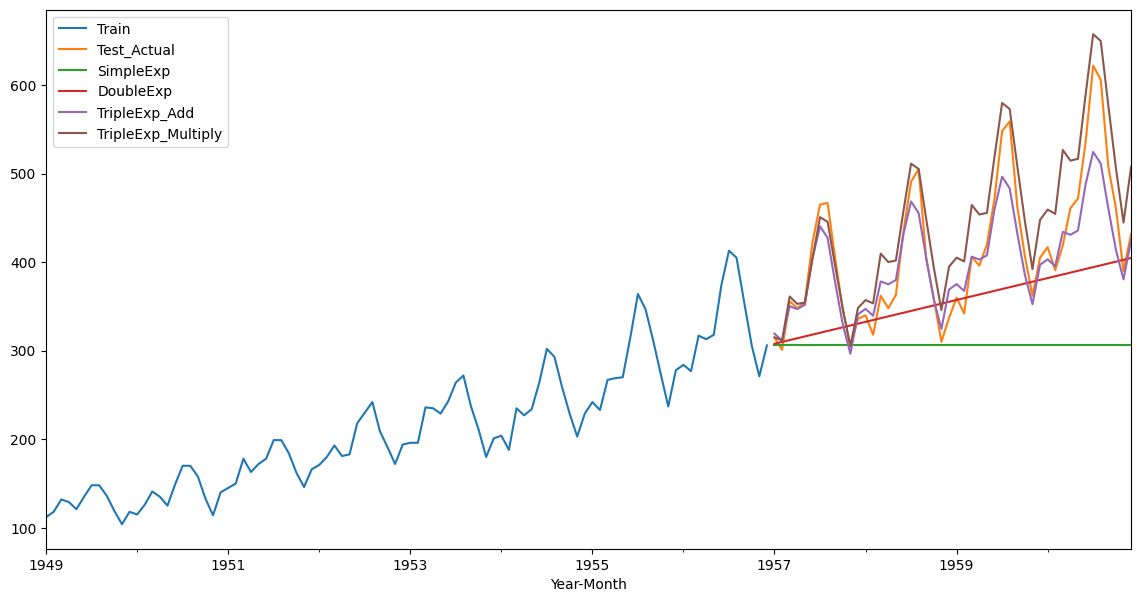

In [62]:
plt.figure(figsize=(14,7))
train['Pax'].plot()
test['Pax'].plot()
SES_predict.plot()
DES_predict.plot()
TES_predict.plot()
TES_mul_predict.plot()

plt.legend(['Train','Test_Actual','SimpleExp','DoubleExp','TripleExp_Add','TripleExp_Multiply'], loc='best')
plt.show()